# Data Loading

In [26]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linear Regression - Predict the financial return/dataset.csv')
print("\n")
print('Data Loaded Successfully!')
print('Shape:', df.shape)
print(df.head())




Data Loaded Successfully!
Shape: (200, 2)
   Investment  Return
0       65.78  112.99
1       71.52  136.49
2       69.40  153.03
3       68.22  142.34
4       67.79  144.30


# Data Visualization

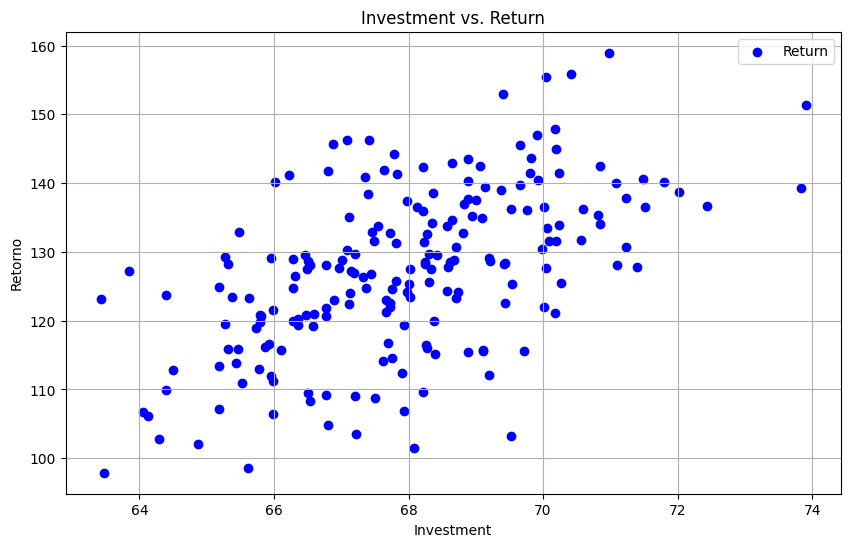

In [27]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Investment'], df['Return'], color='blue', label='Return')
plt.title('Investment vs. Return')
plt.xlabel('Investment')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True)
plt.show()


# Data Preparation

In [28]:
X = df.iloc[:, :-1].values # All columns except the last one
y = df.iloc[:, 1].values # The second column


# Train-Test Split

We split the data into training and test sets in a 70/30 ratio:


*   test_size=0.3 reserves 30% of the data for testing and the remaining 70% for training the model.

*   random_state=0 ensures reproducibility of results.


*   We reshape X_treino and convert it to float32 for compatibility with certain libraries and potential performance optimizations.



In [29]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)
X_treino = X_treino.reshape(-1, 1).astype(np.float32)


# Model Building



1.   Instantiate: We create an instance of the LinearRegression class from
2.   scikit-learn.
Train: We call fit(X_treino, y_treino) to train the model on our training data.



In [30]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)
print("\nModelo Treinado com Sucesso!")



Modelo Treinado com Sucesso!


# Model Coefficients
After training, we can view the intercept (B0) and coefficient(s) (B1, B2, ...) of the linear regression model:



1.   modelo.coef_ is the slope of the regression line.

2.   modelo.intercept_ is the y-intercept.



In [31]:
print('B1 (coef_):', modelo.coef_)
print('B0 (intercept_):', modelo.intercept_)


B1 (coef_): [3.616159]
B0 (intercept_): -118.42083


# Plotting the Regession Line



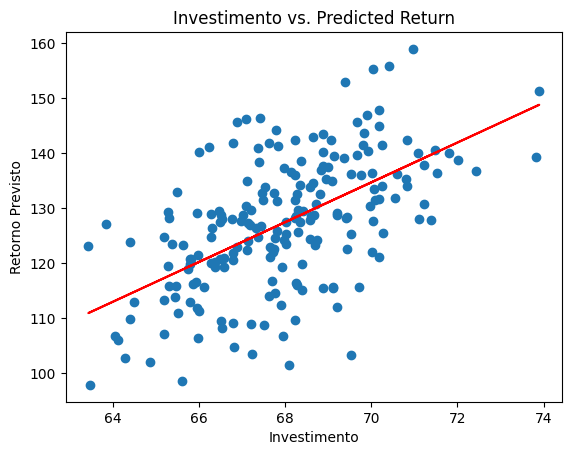

In [32]:
regression_line = modelo.coef_ * X + modelo.intercept_
plt.scatter(X, y)
plt.title('Investimento vs. Predicted Return')
plt.xlabel('Investimento')
plt.ylabel('Retorno Previsto')
plt.plot(X, regression_line, color='red')
plt.show()


# Making Predictions and Comparing Results
We use our test set to see how well the model generalizes to unseen data:


*   y_pred contains the predicted values for the test set.
*   We create a DataFrame to compare the Real Value vs. Predicted Value side by side.



In [33]:
y_pred = modelo.predict(X_teste)
df_valores = pd.DataFrame({'Valor Real': y_teste, 'Valor Previsto': y_pred})
print(df_valores)


    Valor Real  Valor Previsto
0       137.90      139.158173
1       122.61      132.649087
2       126.48      121.366671
3       128.14      123.030104
4       118.89      119.305460
5       109.17      123.066266
6       123.30      130.009291
7       133.84      129.539190
8       125.61      128.562827
9       120.82      121.981418
10      137.55      131.094139
11      123.29      118.907683
12      135.02      124.259598
13      136.74      143.533725
14      134.63      129.792321
15      136.46      134.746459
16      136.22      136.879993
17      132.58      128.454343
18      121.23      126.248486
19      128.52      128.382019
20      124.22      130.153937
21      116.46      128.418181
22      128.76      129.900806
23      115.91      117.750512
24      128.73      122.053741
25      135.29      130.877169
26      119.25      122.343034
27      129.15      120.101015
28      128.27      132.612925
29      106.45      120.173339
30      129.50      121.909095
31      

# Bar Plot Comparison
A quick visual comparison can be made with a bar chart:

*   We stack two sets of bars: one for actual values and one for predicted values.
*   The x-axis ticks (plt.xticks) are labeled with the test set’s “Investimento” values.



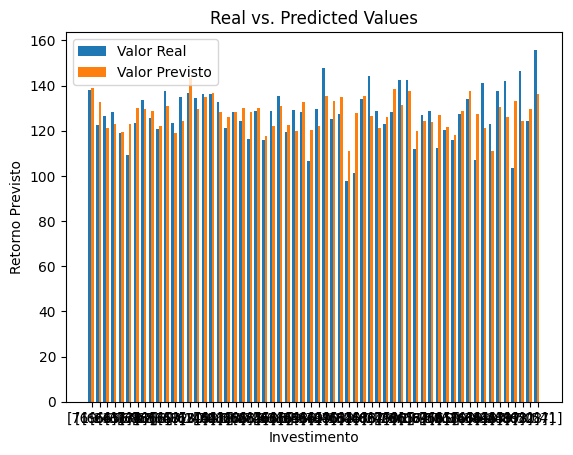

In [34]:
fig, ax = plt.subplots()
index = np.arange(len(X_teste))
bar_width = 0.35

actual = plt.bar(index, df_valores['Valor Real'], bar_width, label='Valor Real')
predicted = plt.bar(index + bar_width, df_valores['Valor Previsto'], bar_width, label='Valor Previsto')

plt.xlabel('Investimento')
plt.ylabel('Retorno Previsto')
plt.title('Real vs. Predicted Values')
plt.xticks(index + bar_width, X_teste)
plt.legend()
plt.show()


# Model Evaluation
We use standard regression metrics from scikit-learn to quantify model performance:



*   MAE (Mean Absolute Error): Average of the absolute differences between predicted and actual values.

*   MSE (Mean Squared Error): Average of squared differences between predicted and actual values.


*   RMSE (Root Mean Squared Error): Square root of the MSE—often used to interpret the error in the same units as the target variable.

*   R² Score: Measures how much variance in the target variable is explained by the model (the closer to 1, the better).








In [35]:
print('MAE (Mean Absolute Error):', mean_absolute_error(y_teste, y_pred))
print('MSE (Mean Squared Error):', mean_squared_error(y_teste, y_pred))
print('RMSE (Root Mean Squared Error):', math.sqrt(mean_squared_error(y_teste, y_pred)))
print('R2 Score:', r2_score(y_teste, y_pred))


MAE (Mean Absolute Error): 7.997080134789149
MSE (Mean Squared Error): 107.93666404700726
RMSE (Root Mean Squared Error): 10.389257146062333
R2 Score: 0.20981305341618306


# Predicting New Data
Finally, we accept user input for a new investment amount and predict the return:



*   We parse the user input into a float.


*   We reshape it to match the shape expected by the model.
*   We predict using modelo.predict(inv) to get the forecasted return.



*   This demonstrates how the model can be integrated into a real-time application where users or external processes supply new investment data.




In [36]:
input_inv = input('\nEnter the investment value: ')
input_inv = float(input_inv)
inv = np.array([input_inv])
inv = inv.reshape(-1, 1)

pred_score = modelo.predict(inv)

print("Investment =", input_inv)
print("Predicted Return = {:.4}".format(pred_score[0]))



Enter the investment value: 100
Investment = 100.0
Predicted Return = 243.2
